In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
data.rename(columns = {'yrs.since.phd':'yrs_since_phd', 'yrs.service':'yrs_service'}, inplace = True)

data.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.shape

(397, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs_since_phd  397 non-null    int64 
 3   yrs_service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
data.isnull().sum()

rank             0
discipline       0
yrs_since_phd    0
yrs_service      0
sex              0
salary           0
dtype: int64

In [7]:
data.describe()

,yrs_since_phd,yrs_service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
print(data['rank'].unique())
print(data['sex'].unique())
print(data['discipline'].unique())

['Prof' 'AsstProf' 'AssocProf']
['Male' 'Female']
['B' 'A']


In [9]:
# Since the Categorical data in Column --> rank, is in order, the use of Ordinal Encoder will be best.

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories = [['AsstProf','AssocProf','Prof']])

data['rank'] = ord_enc.fit_transform(data[['rank']])

In [10]:
# Using get_dummies for other columns encoding.

data[['sex', 'discipline']] = pd.get_dummies(data[['sex', 'discipline']], drop_first = True)

In [11]:
data.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,2.0,1,19,18,1,139750
1,2.0,1,20,16,1,173200
2,0.0,1,4,3,1,79750
3,2.0,1,45,39,1,115000
4,2.0,1,40,41,1,141500


In [12]:
print(data['rank'].value_counts(), '\n')
print(data['sex'].value_counts(), '\n')
print(data['discipline'].value_counts())

2.0    266
0.0     67
1.0     64
Name: rank, dtype: int64 

1    358
0     39
Name: sex, dtype: int64 

1    216
0    181
Name: discipline, dtype: int64


In [13]:
data.shape

(397, 6)

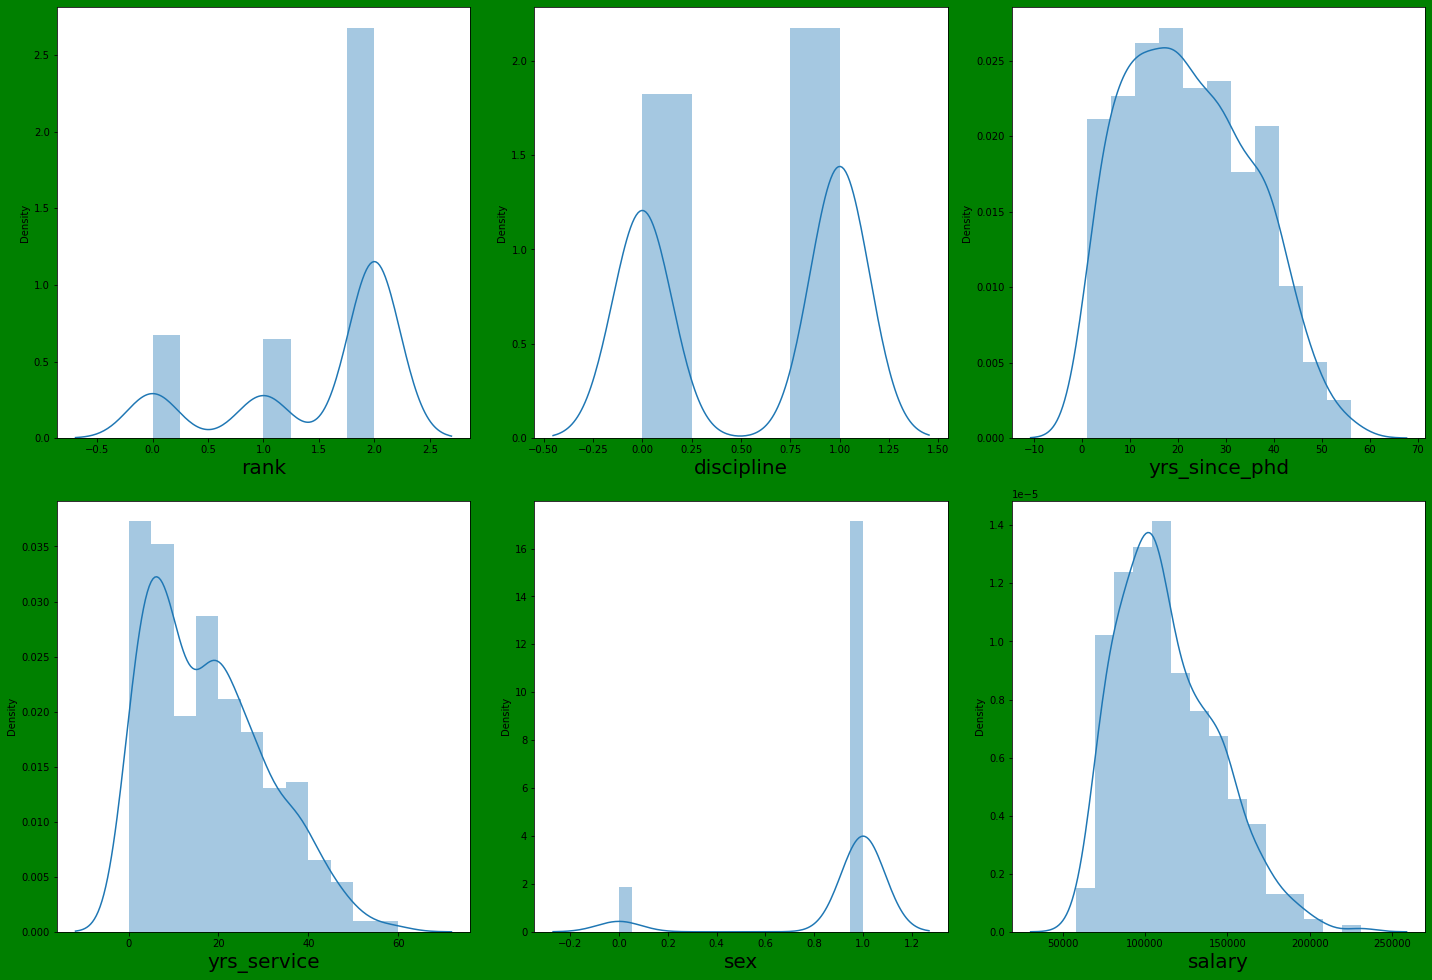

In [14]:
plt.figure(figsize = (20,20), facecolor = 'green')
plotnumber = 1

for column in data:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

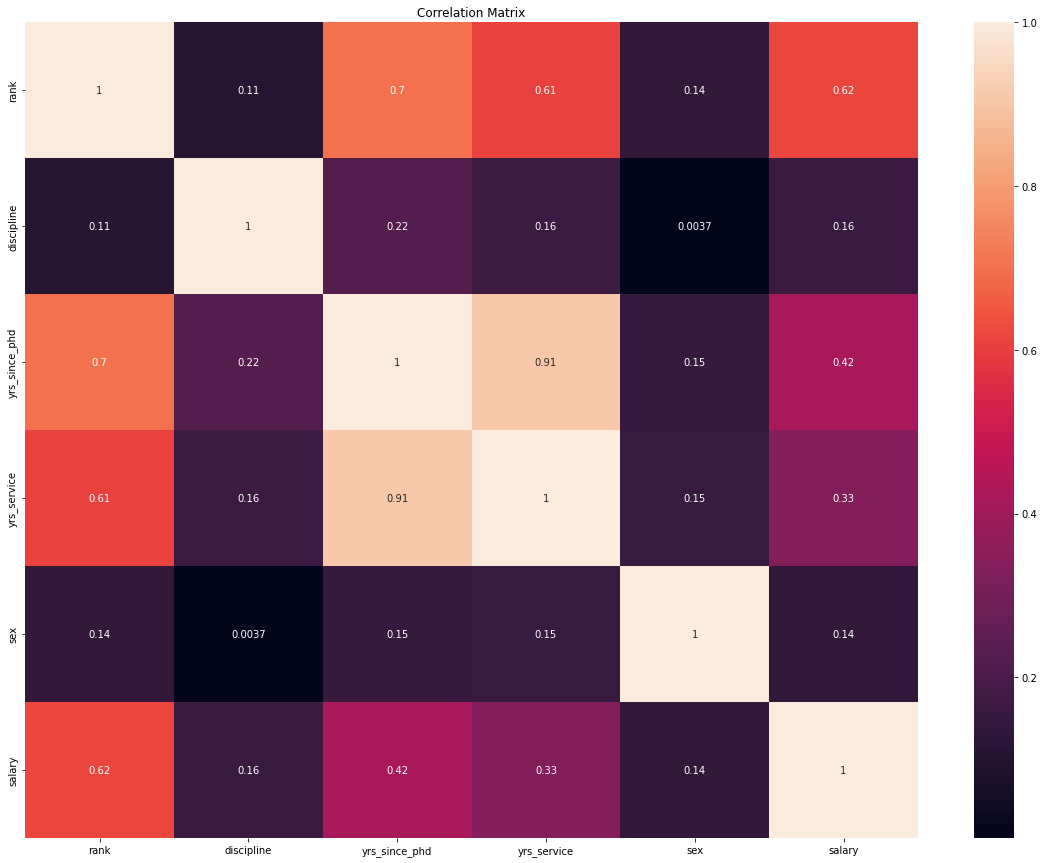

In [15]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))

sns.heatmap(data_corr, annot=True)

plt.title("Correlation Matrix")
plt.show()

Seems like yrs_since_phd and yrs_service are correlated

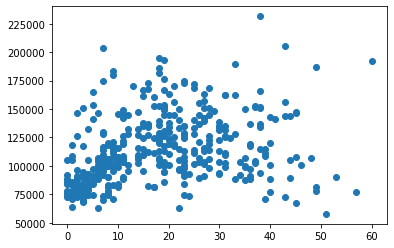

In [43]:
plt.scatter(data.yrs_service, data.salary)
plt.show()

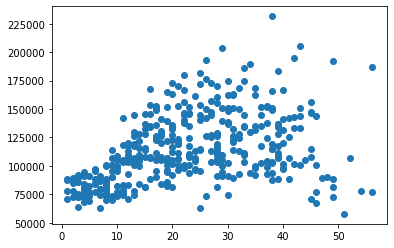

In [44]:
plt.scatter(data.yrs_since_phd, data.salary)
plt.show()

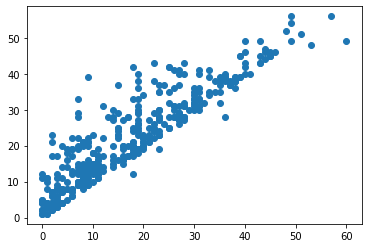

In [45]:
plt.scatter(data.yrs_service, data.yrs_since_phd)
plt.show()

there seems to be a linear relation between yrs_since_phd and yrs_service, but there are other points as well which does not follows the same relation.

therefore, I will not take risk to delete any of the column.

In [33]:
x = data.drop(columns = ['salary'])
y = data['salary']

In [34]:
x.skew().sort_values(ascending = False)

yrs_service      0.650569
yrs_since_phd    0.300880
discipline      -0.177684
rank            -1.132759
sex             -2.709958
dtype: float64

In [35]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [36]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

yrs_service     -0.122152
yrs_since_phd   -0.132757
discipline      -0.177684
rank            -0.831964
sex             -2.709958
dtype: float64

In [37]:
x = pd.DataFrame(x_new, columns = x.columns)

In [38]:
x.head()

,rank,discipline,yrs_since_phd,yrs_service,sex
0,0.689756,0.915403,-0.127295,0.250619,0.330058
1,0.689756,0.915403,-0.049178,0.105112,0.330058
2,-1.714047,0.915403,-1.628121,-1.288032,0.330058
3,0.689756,0.915403,1.565162,1.416860,0.330058
4,0.689756,0.915403,1.279680,1.506524,0.330058


In [39]:
x.skew()[np.abs(x.skew())<0.20].all()

True

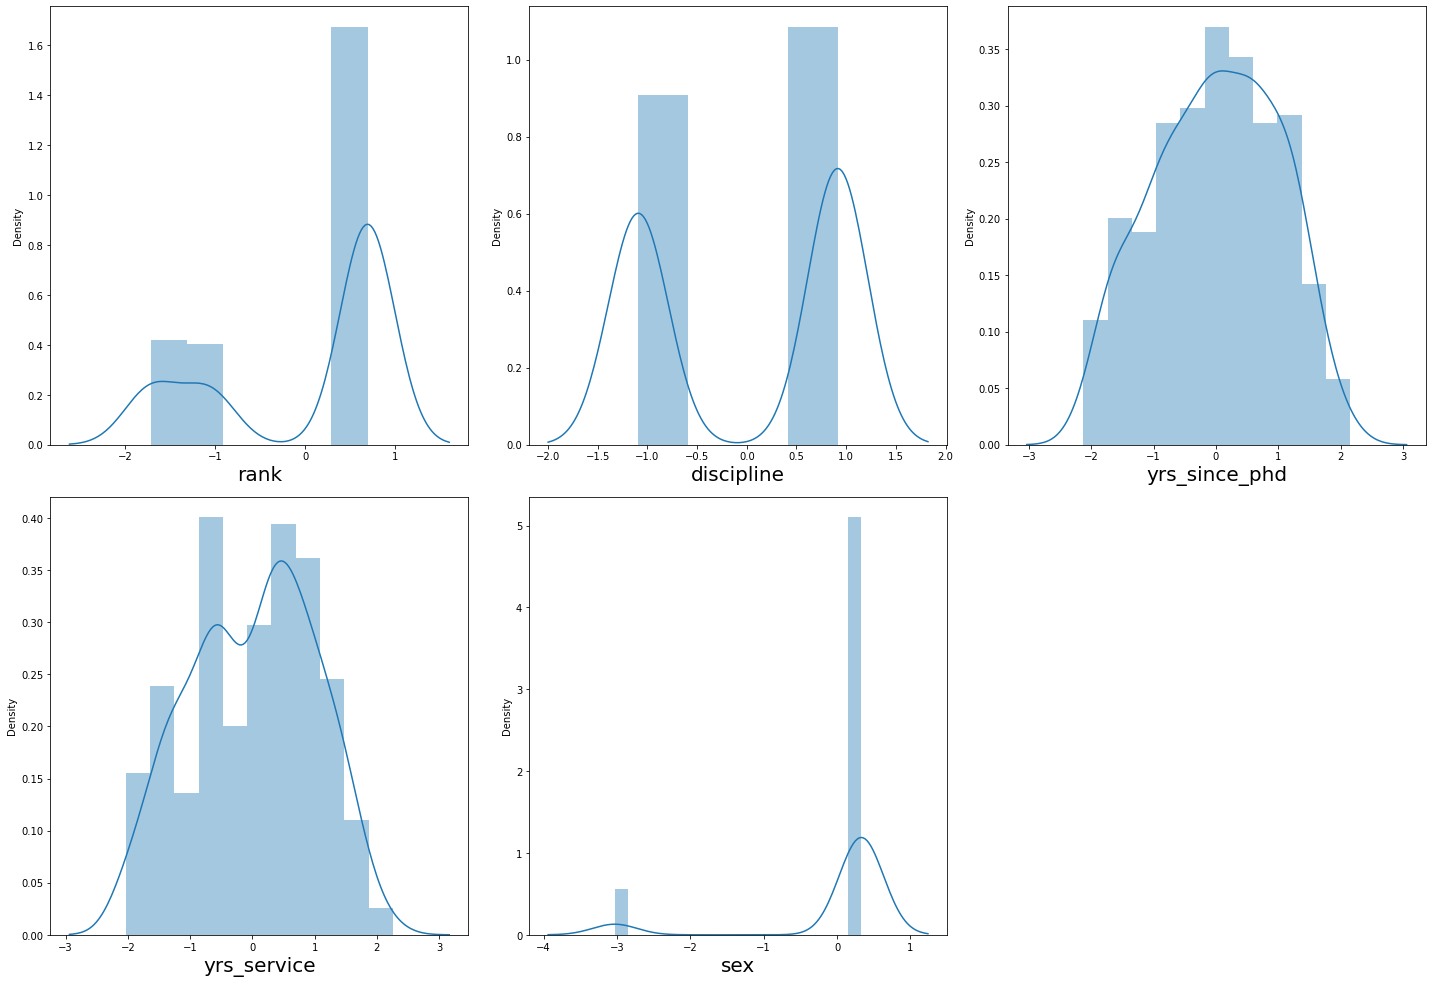

In [40]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

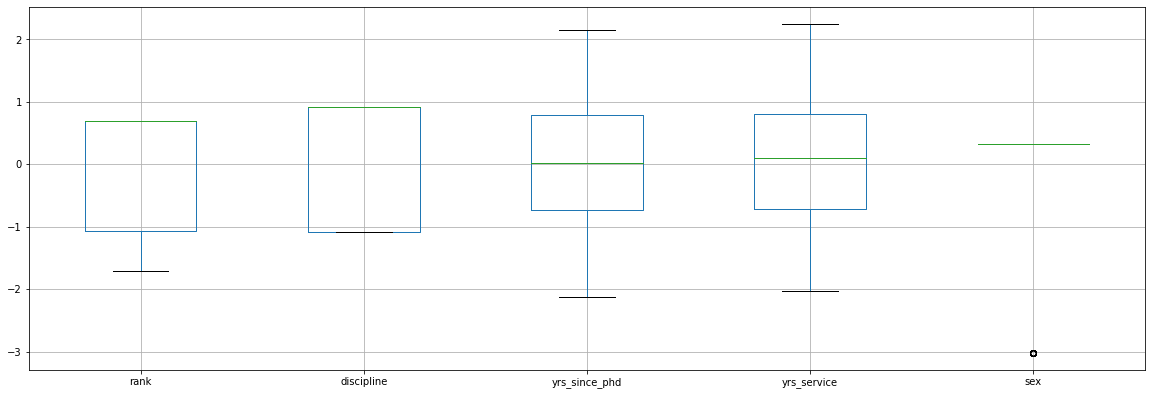

In [41]:
x.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

There seems to be no outlier.

In [42]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

rank              True
discipline        True
yrs_since_phd     True
yrs_service       True
sex              False
dtype: bool

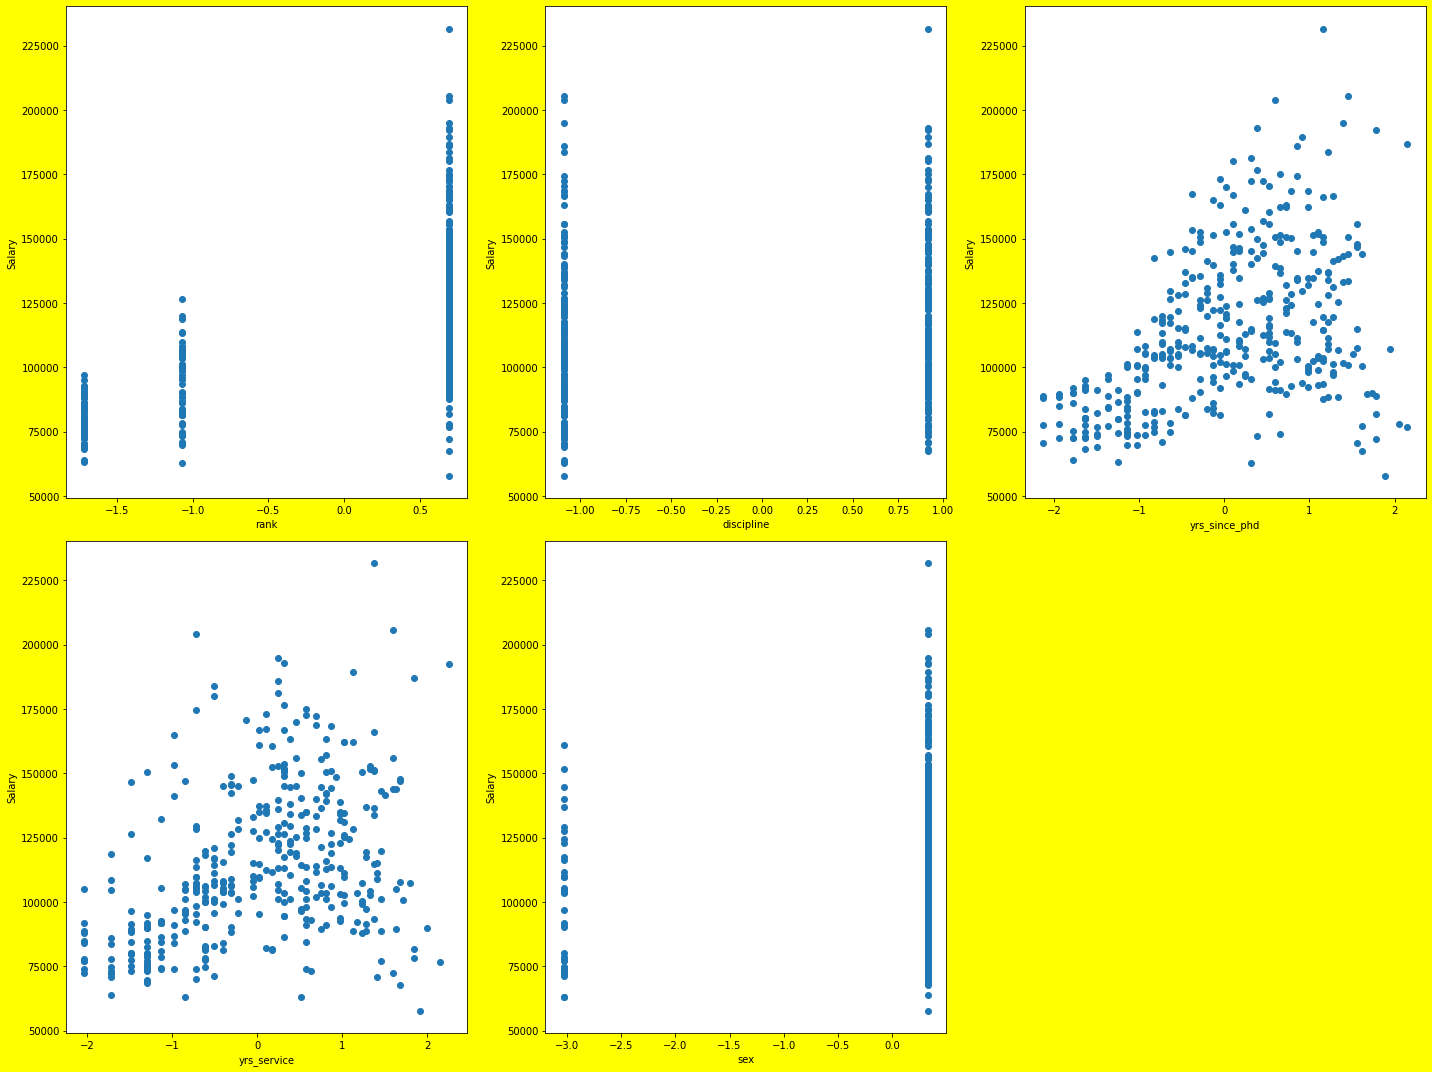

In [46]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Salary', fontsize = 10)
    plotnumber +=1
plt.tight_layout()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Data Scaling

scaler = StandardScaler()
 
x_scaled = scaler.fit_transform(x)

BEST RANDOM STATE

In [49]:
max_r2_score = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    r2_score = LR.score(x_test,y_test)
    print('r2_score', r2_score*100,'%', 'random_state', i)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 48.865070618151385 % random_state 1
r2_score 48.865070618151385 % random_state 1
r2_score 40.13572878704621 % random_state 2
r2_score 41.99099849902876 % random_state 3
r2_score 40.07571821082192 % random_state 4
r2_score 34.151054115199166 % random_state 5
r2_score 43.76802749646895 % random_state 6
r2_score 51.171126214112974 % random_state 7
r2_score 51.171126214112974 % random_state 7
r2_score 34.19335089731042 % random_state 8
r2_score 40.100172621621475 % random_state 9
r2_score 40.947395658032704 % random_state 10
r2_score 37.72188639833553 % random_state 11
r2_score 42.6362911600111 % random_state 12
r2_score 39.94645589104393 % random_state 13
r2_score 22.65715291635019 % random_state 14
r2_score 40.7589237109824 % random_state 15
r2_score 43.09684935441142 % random_state 16
r2_score 42.13995012557 % random_state 17
r2_score 45.54434510410492 % random_state 18
r2_score 52.83550053994732 % random_state 19
r2_score 52.83550053994732 % random_state 19
r2_score 51.7121736

In [50]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.5800438430902026 on Random_state 80


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 80)

In [52]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [53]:
LR.score(x_test, y_test)

0.5800438430902026

In [54]:
mean_squared_error(y_test, y_pred)

284368650.17323595

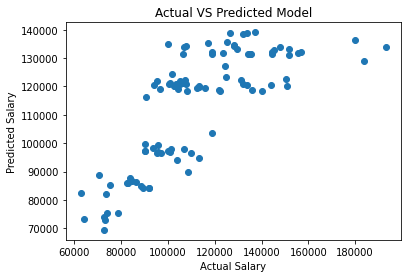

In [55]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual VS Predicted Model')
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  12912.008537582318
Mean Squared Error:  284368650.17323595
Square Root of Mean Square Error:  16863.233680799065


These are very big error values, therefore model needs to be regularize.

# Model Regualrization

In [57]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [58]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [59]:
alpha = lasscv.alpha_

alpha

45.430196467377115

In [60]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=45.430196467377115)

In [61]:
lasso_reg.score(x_test,y_test)

0.5789527488957673

# Using Ridge Model

In [62]:
ridgecv = RidgeCV(alphas = np.arange(0.001,2,0.01), normalize = True)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       1.621e+00, 1.631e+00, 1.641e+00, 1.651e+00, 1.661e+00, 1.671e+00,
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00]),
        normalize=True)

In [63]:
alpha = ridgecv.alpha_

alpha

0.030999999999999996

In [64]:
ridge_model = Ridge(alpha)

ridge_model.fit(x_train,y_train)

Ridge(alpha=0.030999999999999996)

In [65]:
ridge_model.score(x_test,y_test)

0.580037790373435

In [67]:
param_grid = {'copy_X': [True,False],
              'fit_intercept': [True,False],
              'normalize': [True,False]}

grd = GridSearchCV(LR, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

LR = grd.best_estimator_

LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

print('R2 Score: ', LR.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
R2 Score:  0.5800438430902026
Mean Squared Error:  284368650.17323595


In [68]:
from sklearn import svm

regr = svm.SVR()

param_grid = {'C':[0.001, 2,3,4,5,6,7,10],
              'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
             'epsilon' : [0.01, 0.05, 0.075, 0.1]}

grd = GridSearchCV(regr, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

regr = grd.best_estimator_

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

print('R2 Score: ', regr.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'C': 10, 'epsilon': 0.01, 'gamma': 0.2}
R2 Score:  -0.017407475077829915
Mean Squared Error:  688926178.6110344


In [69]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()

param_grid = {'criterion':['squared_error', 'absolute_error'],
             'max_depth': range(10,15),
             'min_samples_leaf': range(2,10),
             'min_samples_split': range (3,10),
             'max_leaf_nodes': range(2,4)}

grd = GridSearchCV(clf, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

clf = grd.best_estimator_

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('R2 Score: ', clf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'criterion': 'squared_error', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}
R2 Score:  0.4998061719209127
Mean Squared Error:  338700698.57407844


In [70]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid = {'algorithm': ['kd_tree', 'brute'],
              'leaf_size': [3,5,6,7,8,9,10],
              'n_neighbors': [1,3,5,7,9,11,13]}

grd = GridSearchCV(knn, param_grid = param_grid)
grd.fit(x_train, y_train)

print("Best parameters: ", grd.best_params_)

knn = grd.best_estimator_

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


print('R2 Score: ', knn.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best parameters:  {'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 5}
R2 Score:  0.42187357126157043
Mean Squared Error:  391471894.0651999


In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {'n_estimators': np.arange(10,100,10),
         'max_depth': np.arange(1,21,5),
         'min_samples_split': np.arange(2,21,5),
         'min_samples_leaf': np.arange(1,11,2)}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', rf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best Param ==> {'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 12, 'n_estimators': 10}
R2 Score:  0.6126244785334574
Mean Squared Error:  262307034.5251656


In [72]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('R2 Score: ', xgb.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

R2 Score:  0.21117403085555464
Mean Squared Error:  534144749.1038495
